Name - Utkarsha Mokashi

Data Science Intern @LetsGrowMore

Task 1 - Iris Flower Classification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
df.shape

(150, 6)

In [5]:
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

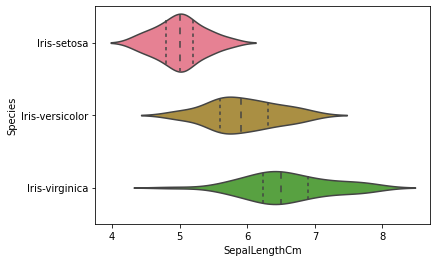

In [6]:
sns.violinplot(y='Species', x='SepalLengthCm', data=df, inner='quartile')
plt.show()

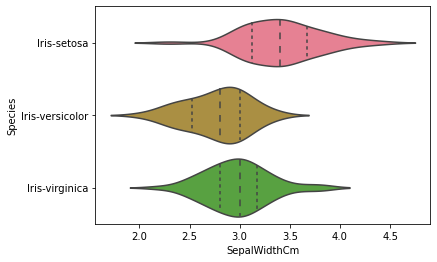

In [7]:
sns.violinplot(y='Species', x='SepalWidthCm', data=df, inner='quartile')
plt.show()

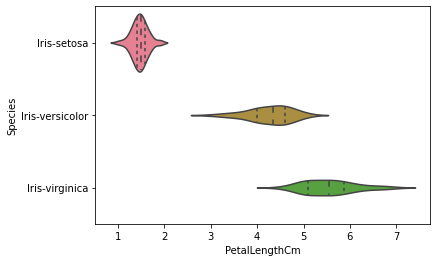

In [8]:
sns.violinplot(y='Species', x='PetalLengthCm', data=df, inner='quartile')
plt.show()

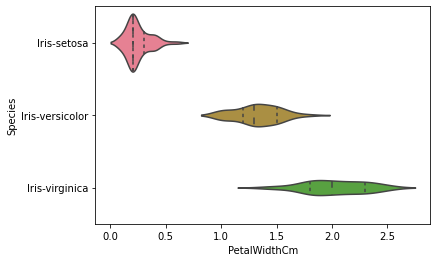

In [9]:
sns.violinplot(y='Species', x='PetalWidthCm', data=df, inner='quartile')
plt.show()

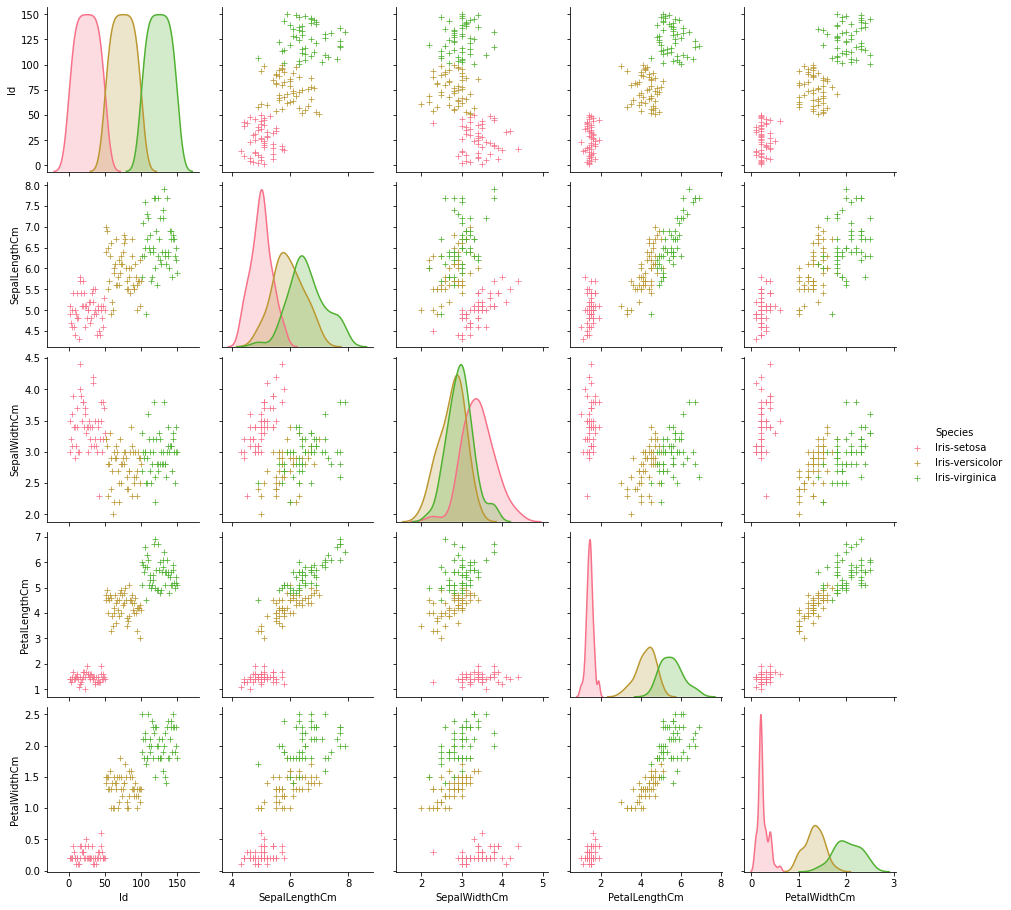

In [10]:
sns.pairplot(df, hue='Species', markers='+')
plt.show()

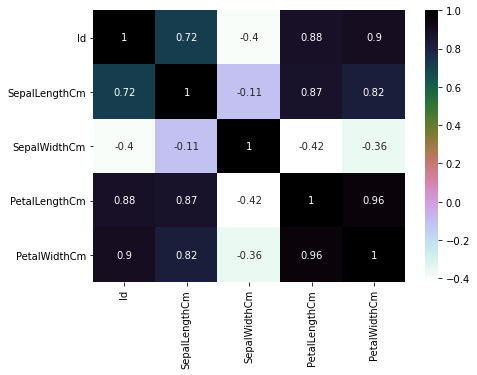

In [11]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True, cmap='cubehelix_r')
plt.show()

In [12]:
X = df.drop(['Species'], axis=1)
y = df['Species']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (150, 5) | y shape: (150,) 


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [14]:
model = SVC(gamma='auto')
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [15]:
print(f'Test Accuracy: {accuracy_score(y_test, prediction)}')
print(f'Classification Report: \n {classification_report(y_test, prediction)}')

Test Accuracy: 1.0
Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



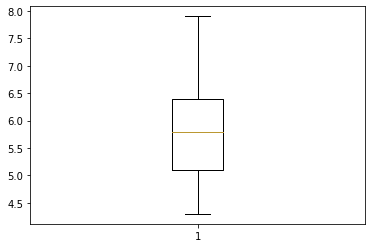

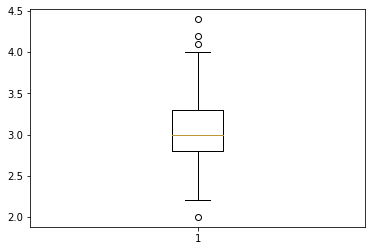

In [16]:
plt.figure(1)
plt.boxplot([df['SepalLengthCm']])
plt.figure(2)
plt.boxplot([df['SepalWidthCm']])
plt.show()

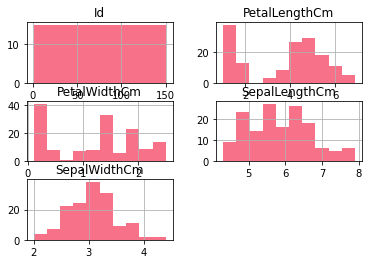

In [17]:
df.hist()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B4B0B3F760>,
      dtype=object)

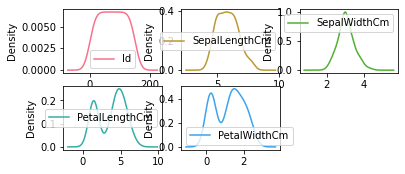

In [18]:
df.plot(kind ='density',subplots = True, layout =(3,3),sharex = False)

Id                  AxesSubplot(0.125,0.536818;0.133621x0.343182)
SepalLengthCm    AxesSubplot(0.285345,0.536818;0.133621x0.343182)
SepalWidthCm      AxesSubplot(0.44569,0.536818;0.133621x0.343182)
PetalLengthCm    AxesSubplot(0.606034,0.536818;0.133621x0.343182)
PetalWidthCm     AxesSubplot(0.766379,0.536818;0.133621x0.343182)
dtype: object

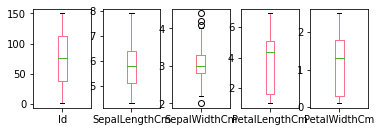

In [19]:
df.plot(kind ='box',subplots = True, layout =(2,5),sharex = False)

In [20]:
#Using Support Vector
model1 = SVC()
model1.fit(X_train,y_train)
pred_y = model1.predict(X_test)
print("Acc=",accuracy_score(y_test,pred_y))

Acc= 0.9333333333333333


In [21]:
model3 = GaussianNB()
model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred3))

Accuracy Score: 1.0


In [22]:
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(X_train,y_train)
y_pred4 = model4.predict(X_test)
print("Accuracy Score:",accuracy_score(y_test,y_pred4))

Accuracy Score: 0.9666666666666667


In [23]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'Naive Bayes','KNN' ,'Decision Tree'],
    'Score': [0.947,0.947,0.947,0.947,0.921]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.947,Logistic Regression
0.947,Support Vector Machines
0.947,Naive Bayes
0.947,KNN
0.921,Decision Tree
